In [36]:
import math
import sklearn
import matplotlib
from sklearn import tree
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

In [38]:
#method to get feature names from attributes file
def get_features(filename):
    feat_list = []
    fin = open(filename, "r")

    for line in fin:
        attrib = line.strip().split(':')
        feat_list.append(attrib[0])

    return feat_list

In [39]:
feat_names = get_features("car.c45-names")
print(feat_names)

['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'label']


In [42]:
cutoff =  math.ceil(len(car_data) * .66) #2/3 | 1/3 split
training_set = car_data[:cutoff] #2/3 for training
test_set = car_data[cutoff:] #1/3 for testing

print(len(training_set))
print(len(test_set))
print(training_set[1])

1141
587
['vhigh', 'vhigh', '2', '2', 'small', 'med', 'unacc']


In [43]:
#break up training instances into features (X) and label (Y)
X_train = [training_set[i][:len(training_set[i])-2] for i in range(len(training_set))]
Y_train = [(training_set[i][len(training_set[i])-1]) for i in range(len(training_set))]
print(X_train[0])
print(feat_names)
print(Y_train[0])

['vhigh', 'vhigh', '2', '2', 'small']
['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'label']
unacc


In [44]:
X_test = [test_set[i][:len(test_set[i])-2] for i in range(len(test_set))]
Y_test = [(training_set[i][len(training_set[i])-1]) for i in range(len(training_set))]
print(X_test[0])
print(Y_test[0])

['med', 'med', '4', '2', 'big']
unacc


In [83]:
def get_inst_features_from_file(filename):
    instances = []
    fin = open(filename, "r")

    for line in fin:
        inst = []
        data = line.strip().split(",")
        #buying
        if data[0] == "vhigh":
            inst.append(0)
        elif data[0] == "high":
            inst.append(1)
        elif data[0] == "med":
            inst.append(2)
        elif data[0] == "low":
            inst.append(3)
        #maint
        if data[1] == "vhigh":
            inst.append(0)
        elif data[1] == "high":
            inst.append(1)
        elif data[1] == "med":
            inst.append(2)
        elif data[1] == "low":
            inst.append(3)
        #doors
        if data[2] == "5more":
            inst.append(6)
        else:
            inst.append(int(data[2]))
        #persons
        if data[3] == "more":
            inst.append(5)
        else:
            inst.append(int(data[3]))
        #trunk (lug_boot)
        if data[4] == "small":
            inst.append(0)
        elif data[4] == "med":
            inst.append(1)
        elif data[4] == "big":
            inst.append(2)
        #safety
        if data[5] == "low":
            inst.append(0)
        elif data[5] == "med":
            inst.append(1)
        elif data[5] == "high":
            inst.append(2)
        instances.append(inst)

    fin.close()

    return instances

def get_inst_labels_from_file(filename):
    labels = []
    fin = open(filename, "r")

    for line in fin:
        data = line.strip().split(",")
        if data[6] == "unacc":
            labels.append(0)
        elif data[6] == "acc":
            labels.append(1)
        elif data[6] == "good":
            labels.append(2)
        elif data[6] == "vgood":
            labels.append(3)

    fin.close()

    return labels

inst = get_inst_features_from_file("car.data")
label = get_inst_labels_from_file("car.data")
print(len(inst))
print(len(label))

1728
1728


0.8333333333333334

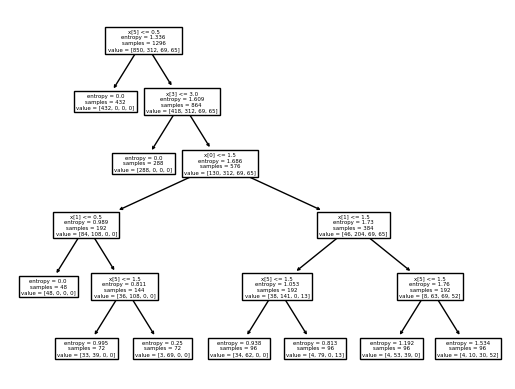

In [107]:
data = get_inst_features_from_file("car.data")
labels = get_inst_labels_from_file("car.data")

#chose to cutoff the backend of data for training since first several hundred instances are mostly labeled as 0
cutoff =  math.ceil(len(data) * .25) #75% | 25% split
training_set_x = data[cutoff:] #75% for training
training_set_y = labels[cutoff:]
test_set_x = data[:cutoff] #25% for testing
test_set_y = labels[:cutoff]
# print(training_set_x[0])
# print(training_set_y)
# print(test_set_x[0])
# print(test_set_y)

clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=5)
clf = clf.fit(training_set_x, training_set_y)
tree.plot_tree(clf)

pred = clf.predict(test_set_x)
metrics.accuracy_score(test_set_y, pred)

In [111]:
from sklearn.model_selection import train_test_split
car_data = get_inst_features_from_file("car.data")
labels = get_inst_labels_from_file("car.data")


X_train, X_test, y_train, y_test = train_test_split(car_data, labels, test_size=0.25, random_state=16)
print(X_test[0])
print(y_train)

[0, 0, 3, 4, 2, 1]
[3, 0, 1, 0, 1, 0, 0, 0, 0, 3, 0, 0, 1, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 1, 1, 3, 1, 1, 0, 1, 1, 0, 2, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 2, 0, 0, 0, 1, 2, 1, 0, 0, 0, 3, 1, 2, 0, 1, 1, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 3, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 2, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 3, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 2, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 3, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 1, 0, 1, 0, 2, 0, 0, 0, 0, 0, 2, 0, 1, 2, 1, 0, 3, 0, 0, 0, 0, 0, 2, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 3, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0,

In [112]:
#logitcal regression
#link to where I got this from https://www.datacamp.com/tutorial/understanding-logistic-regression-python
#not sure if it looks right for what it is returning
logreg = LogisticRegression(random_state=16)
logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_test)
print(len(X_test))
print(y_pred)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

432
[0 0 0 0 0 0 0 1 3 0 0 1 0 0 1 0 0 1 0 0 0 1 1 0 2 0 1 0 0 0 0 0 0 0 1 0 0
 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 2 3 3 0 0 0 0 0 1 0 2
 0 0 0 1 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0
 0 0 1 0 0 0 0 3 0 0 0 1 0 0 0 0 1 0 1 1 0 0 1 1 0 1 0 0 0 0 1 0 2 0 0 2 0
 0 0 0 0 0 0 0 0 0 0 1 1 3 1 0 0 0 0 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 2 0 3 2 0 1 1 0 0 3 0 0 3 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 0 0 0 1 2 0 1 1 0 0 0 0 0 0 0 0 2 0 1 0 0 0 0 0 1 0 0
 0 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0 3 1 0 0 0 0 1 1
 1 0 1 1 0 3 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 2 2 0 0 0 1 0 1 0 0 0 3 3 1 1 0 0 0 0 0 1 1 0 0 0 3 0 1 0 1 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 1 1 0 0 0 0 3 1 3 0 0 0 0 0 0 0 0 0 0 0]


c:\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([[288,   9,   1,   1],
       [ 35,  64,   0,   1],
       [  1,   4,   9,   1],
       [  0,   4,   2,  12]], dtype=int64)